In [1]:
import aocd
import numpy as np
import matplotlib.pyplot as plt

from intcode import Intcode
from collections import deque
from skimage.segmentation import flood_fill
from scipy.signal import convolve2d

In [2]:
data = aocd.get_data(day=19, year=2019)
instructions = [int(n) for n in data.split(',')]

169


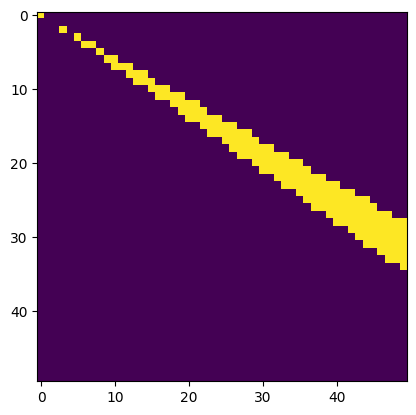

In [3]:
size = 50, 50
grid = np.zeros(size, dtype=int)

for x in range(size[0]):
    for y in range(size[1]):
        inp = deque([x, y])
        out = deque()
        Intcode(instructions, inp, out).run()
        grid[x, y] = out[0]

print(np.sum(grid))
plt.imshow(grid)

In [4]:
def beam_at_coordinates(x, y):
    inp = deque([x, y])
    out = deque()
    Intcode(instructions, inp, out).run()
    return bool(out[0])

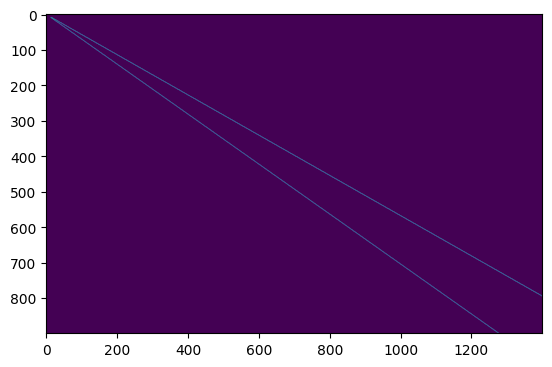

In [5]:
size = 900, 1400
in_bounds = lambda x, y: x < size[0] and y < size[1]

grid = np.zeros(size, dtype=int)

x, y = 8, 13
while in_bounds(x, y):
    x += 1
    if beam_at_coordinates(x, y):
        if in_bounds(x, y):
            grid[x, y] = 1
        continue
    y += 1
    if in_bounds(x, y):
        grid[x, y] = 1
    while not beam_at_coordinates(x, y):
        y += 1
        if in_bounds(x, y):
            grid[x, y] = 1

x, y = 8, 14
while in_bounds(x, y):
    y += 1
    if beam_at_coordinates(x, y):
        if in_bounds(x, y):
            grid[x, y] = 1
        continue
    x += 1
    if in_bounds(x, y):
        grid[x, y] = 1
    while not beam_at_coordinates(x, y):
        x += 1
        if in_bounds(x, y):
            grid[x, y] = 1

plt.imshow(grid)

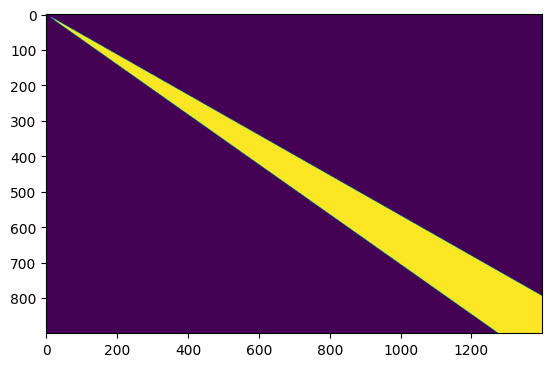

In [6]:

filled = flood_fill(grid, (59, 99), 1, connectivity=1)
plt.imshow(filled)

In [7]:
square_side = 100
conv = convolve2d(filled, np.ones((square_side, square_side)), mode='same')

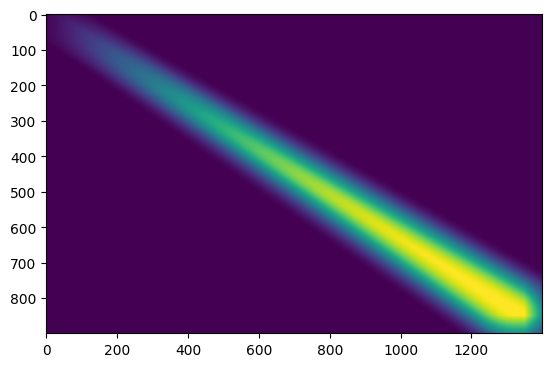

In [8]:
plt.imshow(conv)

In [9]:
xs, ys = np.where(conv == square_side*square_side)
point = xs[0]-square_side//2, ys[0]-square_side//2
print(point)

(699, 1132)


In [10]:
def find():
    for y in range(1120, 1140):
        for x in range(690, 710):
            if beam_at_coordinates(x, y) and beam_at_coordinates(x+99, y) and beam_at_coordinates(x, y+99) and beam_at_coordinates(x+99, y+99):
                return x, y, x*10000+y
find()


(700, 1134, 7001134)